In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

Text(0.5, 1.0, 'Precipation in Hawaii over one year')

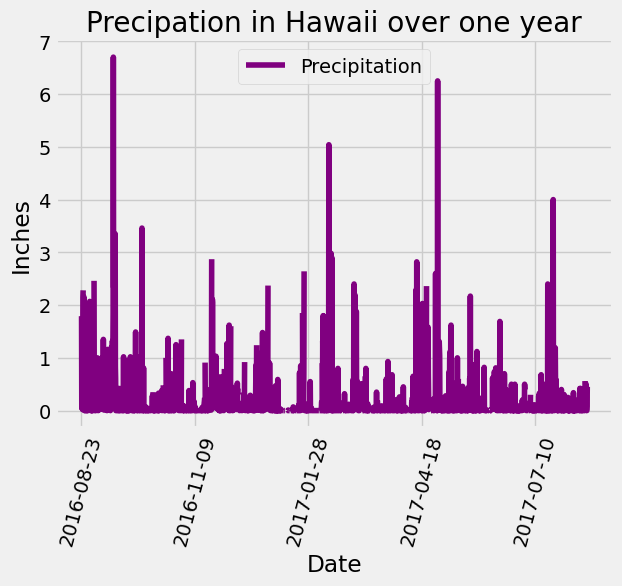

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_new_format = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_later = recent_date_new_format - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_later).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip,columns=(['date','Precipitation']))

# Sort the dataframe by date
precip_df = precip_df.sort_values("date")


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date',y="Precipitation",rot=75, color='purple')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipation in Hawaii over one year")


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations=session.query(Station.station).count()
number_of_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Lowest temp
lowest_temp = session.query(func.min(Measurement.tobs))\
.filter(Measurement.station =="USC00519281").all()

#Highest temp
highest_temp = session.query(func.max(Measurement.tobs))\
.filter(Measurement.station =="USC00519281").all()

#Average temp
average_temp = session.query(func.avg(Measurement.tobs))\
.filter(Measurement.station =="USC00519281").all()

[lowest_temp, highest_temp, average_temp]

[[(54.0,)], [(85.0,)], [(71.66378066378067,)]]

Text(0.5, 1.0, 'Frequency of Observed Temperatures over 12 months')

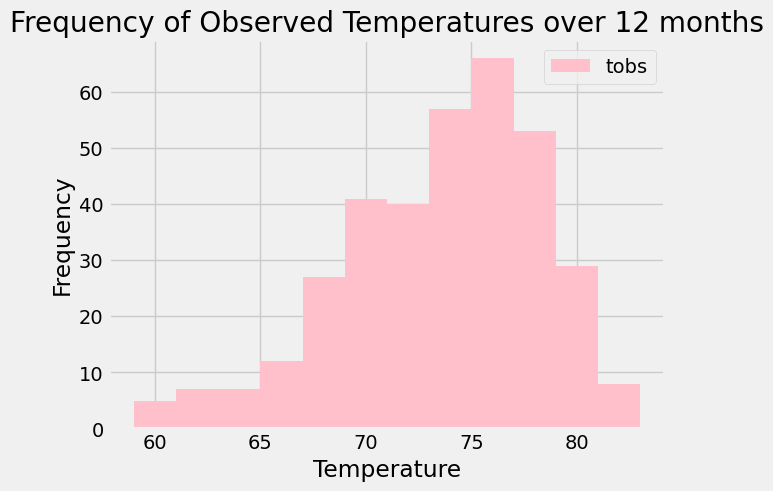

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281")\
.filter(Measurement.date>=one_year_later)
df=pd.DataFrame(most_active_station,columns=["tobs"])
df.plot(kind = 'hist', bins =12, color = "pink")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Frequency of Observed Temperatures over 12 months")

# Close Session

In [24]:
# Close Session
session.close()